<a href="https://colab.research.google.com/github/566u43/DATA-VIUALIZATION-MERN/blob/main/yourcabs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from geopy import distance

In [97]:
data = pd.read_csv('/content/drive/MyDrive/yourcabs1')

<ipython-input-97-1f41dfd84199>:1: DtypeWarning: Columns (9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/yourcabs1')


In [98]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132516.0,22179.0,12.0,NaN,2.0,1096.0,393.0,NaN,NaN,01-01-2013 09:30,NaN,0.0,0.0,01-01-2013 07:51,12.965190,77.719320,13.19956,77.70688,0
1,132529.0,22187.0,65.0,NaN,2.0,1061.0,393.0,NaN,NaN,01-02-2013 01:00,NaN,0.0,0.0,01-01-2013 12:11,12.924878,77.566255,13.19956,77.70688,0
2,132532.0,23180.0,12.0,NaN,2.0,1192.0,353.0,NaN,NaN,01-02-2013 04:30,NaN,0.0,0.0,01-01-2013 12:22,12.976770,77.572700,13.03241,77.59914,0
3,132547.0,30849.0,12.0,NaN,2.0,515.0,849.0,NaN,NaN,01-01-2013 20:15,NaN,0.0,0.0,01-01-2013 16:51,12.978960,77.673450,12.95434,77.60072,0
4,132548.0,22198.0,12.0,NaN,2.0,83.0,463.0,NaN,NaN,01-03-2013 00:30,NaN,0.0,0.0,01-01-2013 17:04,12.924150,77.672290,12.96037,77.58132,0


In [99]:
data.shape

(43431, 19)

In [100]:
# Check for missing values
print(data.isnull().sum())


id                     33431
user_id                33431
vehicle_model_id       33431
package_id             41646
travel_type_id         33431
from_area_id           33451
to_area_id             35581
from_city_id           39719
to_city_id             43066
from_date              33431
to_date                37558
online_booking         33431
mobile_site_booking    33431
booking_created        33431
from_lat               33451
from_long              33451
to_lat                 35581
to_long                35581
Car_Cancellation           0
dtype: int64


In [101]:
# Print information about the DataFrame
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  float64
 1   user_id              10000 non-null  float64
 2   vehicle_model_id     10000 non-null  float64
 3   package_id           1785 non-null   float64
 4   travel_type_id       10000 non-null  float64
 5   from_area_id         9980 non-null   float64
 6   to_area_id           7850 non-null   float64
 7   from_city_id         3712 non-null   float64
 8   to_city_id           365 non-null    float64
 9   from_date            10000 non-null  object 
 10  to_date              5873 non-null   object 
 11  online_booking       10000 non-null  float64
 12  mobile_site_booking  10000 non-null  float64
 13  booking_created      10000 non-null  object 
 14  from_lat             9980 non-null   float64
 15  from_long            9980 non-null  

In [102]:
# Drop columns that are not useful for modeling
data.drop(['id', 'from_lat', 'from_long', 'to_lat', 'to_long'], axis=1, inplace=True)

# Remove duplicates if any
data.drop_duplicates(inplace=True)


In [103]:
from datetime import datetime

In [104]:
data['from_date'] = pd.to_datetime(data['from_date'], format='%m/%d/%Y %H:%M', errors='coerce')
data['booking_created'] = pd.to_datetime(data['booking_created'], format='%m/%d/%Y %H:%M', errors='coerce')


In [105]:
# Check for NaT values and drop them
print(data['from_date'].isnull().sum())
print(data['booking_created'].isnull().sum())
data.dropna(subset=['from_date', 'booking_created'], inplace=True)

4077
4086


In [106]:
# Calculate Booking Lead Time in hours
data['booking_lead_time'] = (data['from_date'] - data['booking_created']).dt.total_seconds() / 3600

In [107]:
# Fill missing values
data.fillna(method='ffill', inplace=True)

<ipython-input-107-0ccc3f1254c7>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [108]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['vehicle_model_id', 'package_id', 'travel_type_id', 'online_booking', 'mobile_site_booking'], drop_first=True)


In [109]:
# Extract date-time features
data['hour_of_day'] = data['from_date'].dt.hour
data['day_of_week'] = data['from_date'].dt.dayofweek

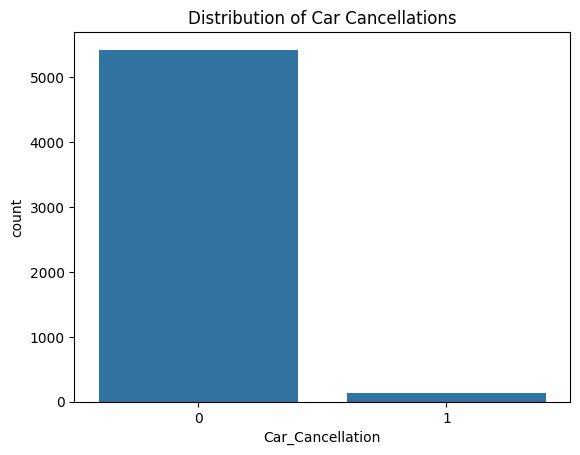

In [110]:
# Data visualization
sns.countplot(x='Car_Cancellation', data=data)
plt.title('Distribution of Car Cancellations')
plt.show()

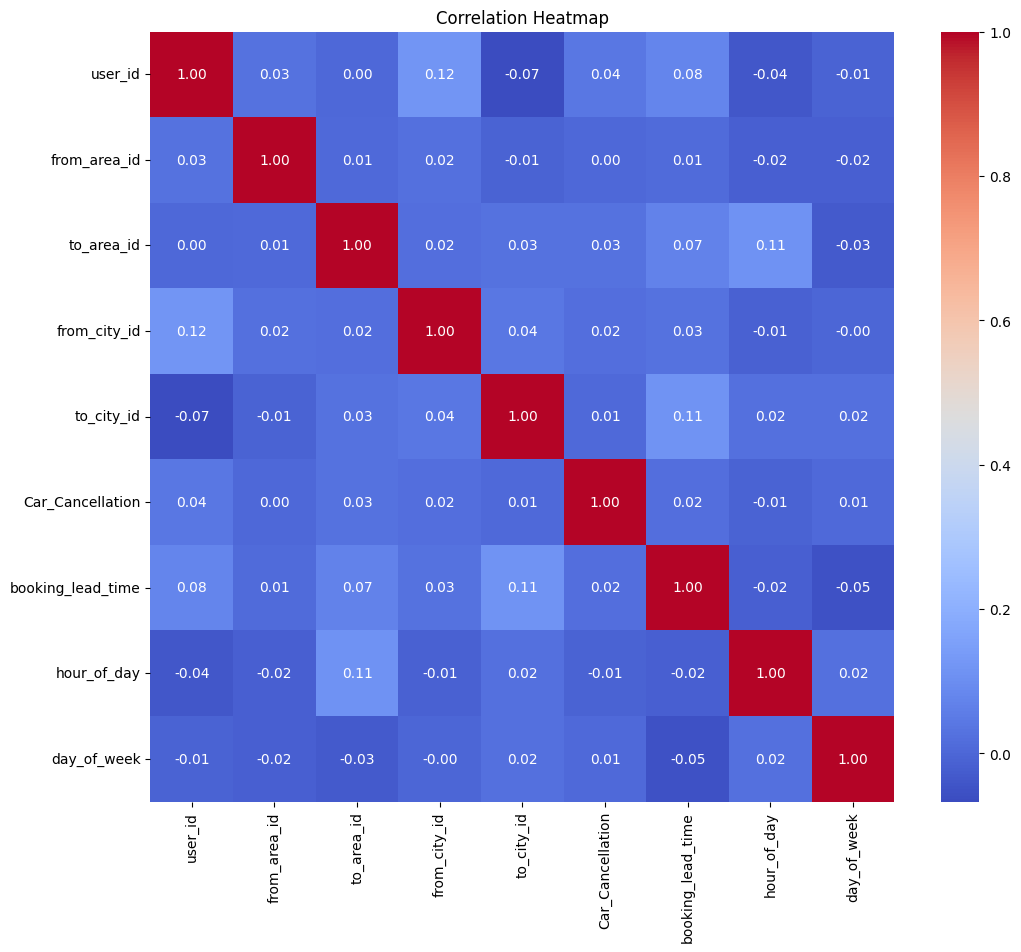

In [111]:
# Ensure all columns used are numeric
numeric_data = data.select_dtypes(include=[np.number])

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [112]:
# Divide Data into Numerical and Categorical
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['uint8']).columns

In [113]:
# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data[numerical_cols], encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [114]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X = data.drop('Car_Cancellation', axis=1)
y = data['Car_Cancellation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Check shapes
print(X_train.shape)
print(y_train.shape)

(6454, 6)
(6454,)


In [116]:
# Check for NaN or Inf values
print(X_train.isnull().sum().sum())
print(np.isinf(X_train).sum().sum())
print(y_train.isnull().sum())
print(np.isinf(y_train).sum())

12040
0
2003
0


In [117]:
# Reset index if necessary
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [118]:
# Debugging information
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6454, 6)
y_train shape: (6454,)
X_test shape: (1614, 6)
y_test shape: (1614,)


In [119]:
# Fill NaNs and replace Infs
X_train = X_train.fillna(0)
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_test = X_test.fillna(0)
X_test.replace([np.inf, -np.inf], 0, inplace=True)

In [120]:
# Ensure y_train and y_test are integers
y_train = y_train.fillna(0).astype(int)
y_test = y_test.fillna(0).astype(int)


In [121]:
# Align columns of X_test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [123]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier

# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [124]:
# Predict and evaluate
y_pred = model.predict(X_test)

In [125]:
# Ensure consistent data types
print("Data type of y_test:", y_test.dtype)
print("Data type of y_pred:", y_pred.dtype)

Data type of y_test: int64
Data type of y_pred: int64


In [126]:
# Ensure consistent shapes
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (1614,)
Shape of y_pred: (1614,)


In [129]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report

# Accuracy and evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.00      0.00      0.00        27

    accuracy                           0.98      1614
   macro avg       0.49      0.50      0.50      1614
weighted avg       0.97      0.98      0.97      1614



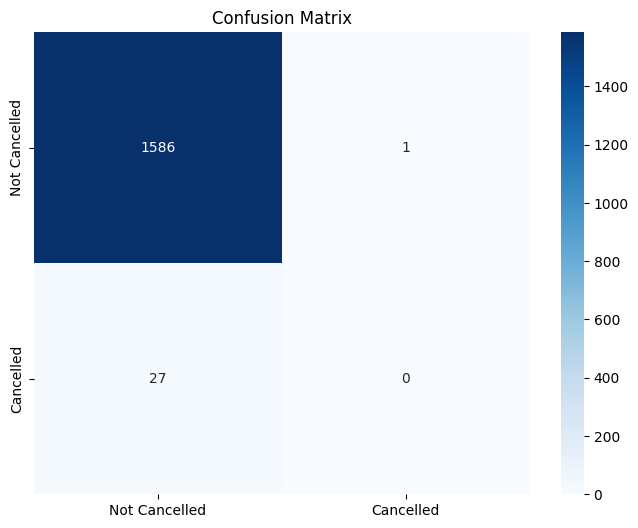

In [131]:
# Import necessary metrics
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.title('Confusion Matrix')
plt.show()


In [132]:
from sklearn.metrics import accuracy_score

# Assuming y_pred contains the predictions from your model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98
